In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyMERLIN.recon import *
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import SphericalVoronoi, geometric_slerp

ImportError: cannot import name 'geometric_slerp' from 'scipy.spatial' (/Users/emilljungberg/opt/anaconda3/lib/python3.7/site-packages/scipy/spatial/__init__.py)

In [7]:
scipy.__path__

['/Users/emilljungberg/opt/anaconda3/lib/python3.7/site-packages/scipy']

In [2]:
def fibonacci(k):
    """
    Calculates the kth Fibonacci number
    """
    
    if k == 0:
        return 0
    elif k==1 or k==2:
        return 1
    else:
        return fibonacci(k-1)+fibonacci(k-2)

In [3]:
# Golden ratio
g = (1 + np.sqrt(5))/2

# Golden angle
ag = 2*np.pi/g**2

print("Golden ratio: {:.6f}\nGolden angle: {:.2f} deg".format(g, np.rad2deg(ag)))

Golden ratio: 1.618034
Golden angle: 137.51 deg


## 2D golden means
The following is derived from [Chan et al. MRM 2009](http://www.doi.org/10.1002/mrm.21837).

In [4]:
def gm_3D_trajectory(n):
    """
    3D Golden means trajectory as proposed by Chan et al.

    Input:
        n: Number of spokes
    """
    # Find the eigen values in equation [5]     
    A = np.array([[0,1,0],
                  [0,0,1],
                  [1,0,1]])
    w, v = np.linalg.eig(A)
    ea = np.real(v[:,0])
    # Normalise the eigen vector    
    ea /= max(ea)
    v1 = ea[0]
    v2 = ea[1]
    print("v1: {}, v2: {}".format(v1, v2))
    m = np.arange(n)
    phi = 2*np.pi*m*v2
    theta = np.arccos(np.mod(m*v1,1))

    traj = np.zeros((3,n))
    traj[0,:] = np.cos(phi)*np.sin(theta)
    traj[1,:] = np.sin(phi)*np.sin(theta)
    traj[2,:] = np.cos(theta)
    
    return traj

v1: 0.4655712318767679, v2: 0.6823278038280193


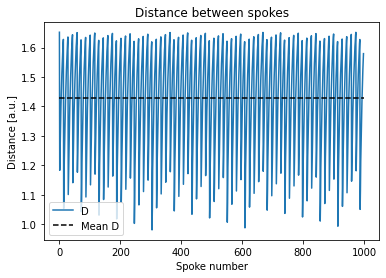

In [5]:
traj = gm_3D_trajectory(1000)
d = np.diff(traj, axis=1)
dmag = np.sqrt(np.sum(d**2, axis=0))

plt.figure()
plt.plot(dmag, label='D')
plt.plot([0,len(dmag)], [np.mean(dmag)]*2, '--k', label=r'Mean D')
plt.title('Distance between spokes')
plt.xlabel('Spoke number')
plt.ylabel('Distance [a.u.]')
plt.legend()
plt.show()

## 3D Phyllotaxis

### Angle between spokes

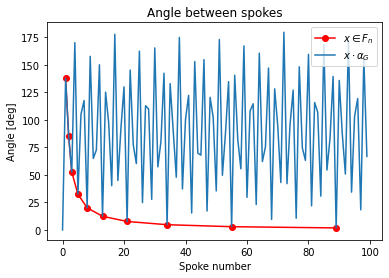

In [6]:
x = np.arange(100)
phi = x*ag
plt.figure()
phi1 = np.mod(phi,2*np.pi)
mask = phi1>np.pi
phi1[mask] = -1*phi1[mask]+2*np.pi
phi1 *= 360/(2*np.pi)

fibnum = np.array([fibonacci(x) for x in range(2,12)])
plt.plot(fibnum, phi1[fibnum], 'o-r', label=r'$x\in F_n$')
plt.plot(x,phi1, label=r'$x\cdot \alpha_G$')
plt.title("Angle between spokes")
plt.xlabel("Spoke number")
plt.ylabel("Angle [deg]")
plt.legend()
plt.show()

The example in section 2.1: Angle between first and 13th spokes (7th Fibonacci number) is then

In [7]:
k = 8
print(r"dPhi{} = {:.1f} deg".format(k,phi1[fibonacci(k)]))

dPhi8 = 7.7 deg


### Trajectory example

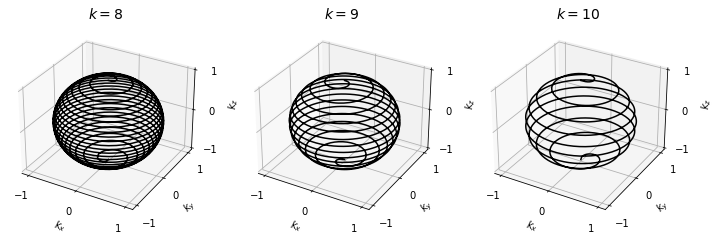

In [8]:
fig = plt.figure(figsize=(12,4))
for (i,sf) in enumerate([8,9,10]):
    traj = linear_phyllotaxis(n=1024, nint=1, sf=sf)
    ax = fig.add_subplot(1,3,i+1,projection='3d')
    ax.plot(traj[:,0], traj[:,1], traj[:,2], 'k')
    ax.set_xticks([-1,0,1])
    ax.set_yticks([-1,0,1])
    ax.set_zticks([-1,0,1])
    ax.set_xlabel(r'$k_x$')
    ax.set_ylabel(r'$k_y$')
    ax.set_zlabel(r'$k_z$')
    ax.set_title(r'$k={}$'.format(sf), fontsize=14)


plt.show()